<a href="https://colab.research.google.com/github/Udhay2898/Netflix_EDA/blob/Master/Nertflix_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
# Loading Dataset
df = pd.read_csv('/content/drive/MyDrive/Data Sets/Netflix_title.csv')
df.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7497,s7498,Movie,Monster High: Great Scarrier Reef,William Lau,"Larissa Galagher, Kate Higgins, Debi Derryberr...",United States,"October 1, 2017",2016,TV-Y7,72 min,Children & Family Movies,"At a Monster High party, Lagoona and pals are ..."
824,s825,Movie,Welcome Home,George Ratliff,"Aaron Paul, Emily Ratajkowski, Riccardo Scamar...",United States,"June 2, 2021",2018,R,97 min,Thrillers,A couple rents a villa in Italy hoping to mend...
1222,s1223,Movie,The Block Island Sound,"Kevin McManus, Matthew McManus","Chris Sheffield, Michaela McManus, Neville Arc...",United States,"March 11, 2021",2020,TV-MA,99 min,"Horror Movies, Independent Movies","On an island, a fisherman's family faces horro..."
1763,s1764,Movie,Piercing,Nicolas Pesce,"Christopher Abbott, Mia Wasikowska, Laia Costa...",United States,"November 1, 2020",2018,R,81 min,"Dramas, Independent Movies, Thrillers",A family man plots to kill a spellbinding sex ...
2481,s2482,Movie,#FriendButMarried,Rako Prijanto,"Adipati Dolken, Vanesha Prescilla, Rendi Jhon,...",Indonesia,"May 21, 2020",2018,TV-G,102 min,"Dramas, International Movies, Romantic Movies","Pining for his high school crush for years, a ..."
5022,s5023,Movie,반드시 잡는다,Hong-seon Kim,Baek Yoon-sik,South Korea,"February 28, 2018",2017,TV-MA,110 min,"Dramas, International Movies, Thrillers",After people in his town start turning up dead...
8442,s8443,TV Show,The Office (U.S.),NaN,"Steve Carell, John Krasinski, Jenna Fischer, R...",United States,"January 1, 2016",2012,TV-14,9 Seasons,TV Comedies,This hit comedy chronicles the foibles of disg...
565,s566,TV Show,Bureau of Magical Things,NaN,"Kimie Tsukakoshi, Elizabeth Cullen, Mia Milnes...","Australia, Germany","July 1, 2021",2020,TV-G,1 Season,"International TV Shows, Kids' TV, TV Mysteries",When a teen accidentally discovers an enchante...
5902,s5903,TV Show,H2O: Mermaid Adventures,NaN,"Sonja Ball, Holly Gauthier-Frankel, Thor Bisho...","Germany, Australia, France, China","July 15, 2015",2015,TV-Y7,2 Seasons,Kids' TV,Three high school friends who turn into mermai...
6468,s6469,Movie,Child's Play,Tom Holland,"Catherine Hicks, Alex Vincent, Brad Dourif, Ch...",United States,"December 31, 2019",1988,R,87 min,"Cult Movies, Horror Movies","When a rash of murders unfolds, 6-year-old And..."


In [20]:
# Exploring Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [21]:
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [22]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [23]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [24]:
# Dropping unnecessary columns
df.drop(['show_id', 'description'], axis=1, inplace=True)

In [25]:
df.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"


In [27]:
# Checking duplicates
df.duplicated().sum()

0

In [28]:
# Checking missing values

df.isnull().sum()

,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3
listed_in,0


In [30]:
# Data Cleaning

df.fillna({'cast':'NA'}, inplace=True)
df.fillna({'director':'Na'},inplace=True)
df.fillna({'country':'-'},inplace=True)
df.fillna({'rating':'-'},inplace=True)
df.fillna({'duration':'-'},inplace=True)
df.fillna({'date_added':'-'},inplace=True)

In [31]:
df.isnull().sum()

,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


In [32]:
# Data Transformation
df.rename(columns={"listed_in":"categories"},inplace=True)

In [33]:
df.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,categories
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,Na,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"


In [35]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()
df.head(1)

,type,title,director,cast,country,date_added,release_year,rating,duration,categories,year_added,month_added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021.0,September


In [37]:
# Data Visualization

df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

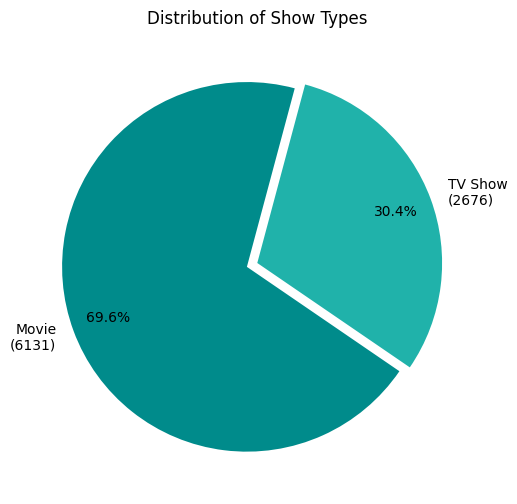

In [168]:
type_counts=df['type'].value_counts()

type_index=type_counts.index

# Create labels with counts
labels_with_counts = [f'{label}\n({count})' for label, count in zip(type_index, type_counts)]

colors =['#008B8B','#20B2AA']

plt.figure(figsize=(8, 6))
plt.pie(type_counts, labels = labels_with_counts, autopct='%1.1f%%', startangle= 75, colors = colors,explode = (0.06, 0), pctdistance = 0.8)
plt.title('Distribution of Show Types')

plt.show()


In [169]:
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'categories', 'year_added',
       'month_added'],
      dtype='object')

In [170]:
df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', '-',
       'TV-Y7-FV', 'UR'], dtype=object)

In [171]:
df.type.unique()

array(['Movie', 'TV Show'], dtype=object)

In [172]:
rating_gr = df.groupby(['rating', 'type']).size().reset_index(name='count')

rating_gr_pivot = rating_gr.pivot_table(index = 'rating',columns = 'type',values = 'count',fill_value = 0)
rating_gr_pivot.max()

,0
type,
Movie,2062.0
TV Show,1145.0


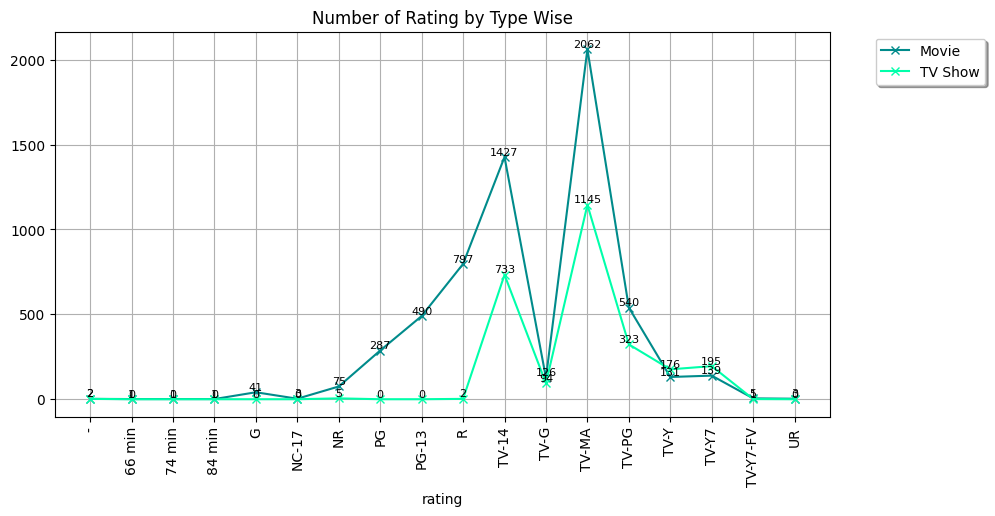

In [185]:
colors =['#008B8B','#00FFAA']

ax = rating_gr_pivot.plot.line(figsize=(10, 5), marker='x', grid=True, color=colors)

# Add data labels
for line in ax.get_lines():
    x_data = line.get_xdata()
    y_data = line.get_ydata()
    for x, y in zip(x_data, y_data):
        ax.text(
            x,                             # X position
            y + 0.1,                       # Y position (just above the line)
            f'{int(y)}',                  # Label text
            ha='center',                  # Horizontal alignment
            va='bottom',                  # Vertical alignment
            fontsize=8,                  # Font size
            rotation=0,                   # Rotate text by 90 degrees
            color = '#000000'             #Color
        )

# Customize x-ticks
tick = range(len(rating_gr_pivot))
plt.xticks(ticks=tick, labels=rating_gr_pivot.index, rotation=90)

# Add legend and title
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fancybox=True, shadow=True)
plt.title('Number of Rating by Type Wise')

# Show plot
plt.show()

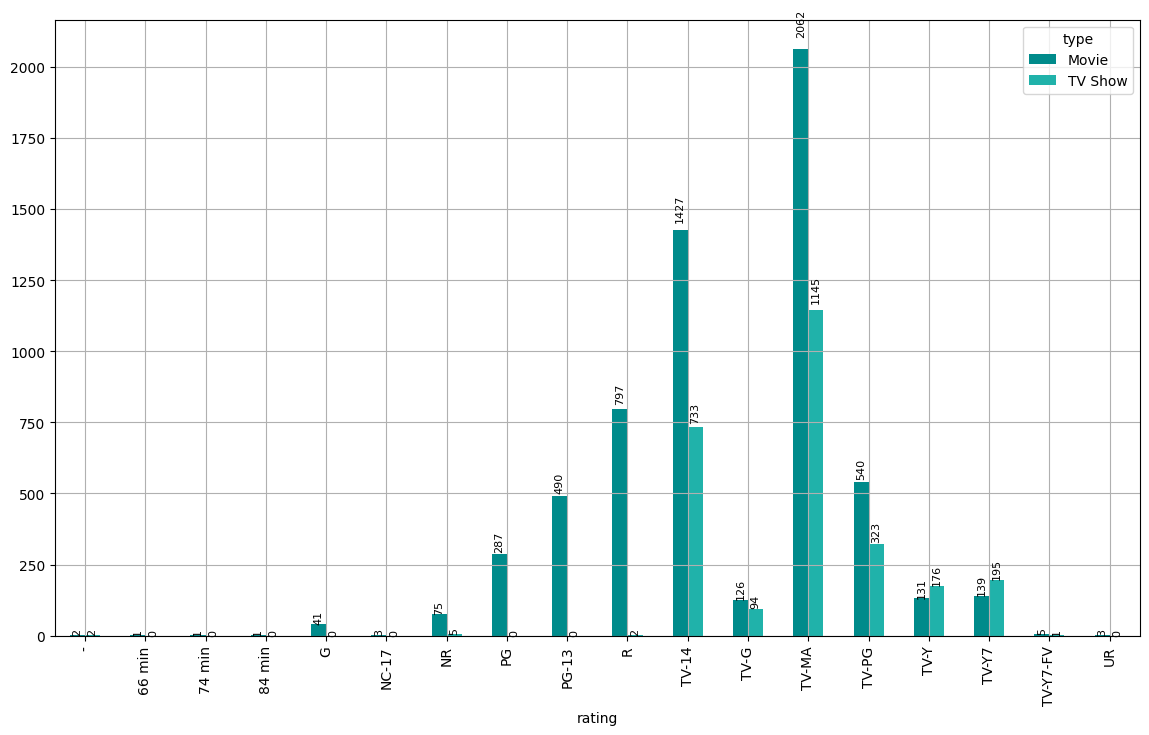

In [174]:
colors =['#008B8B','#20B2AA']

ax = rating_gr_pivot.plot.bar(figsize=(14, 8), grid=True, color=colors)

# Add data labels
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        label = f'{int(height)}'
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # X position
            height + 0.02 * height,             # Y position (slightly above the bar)
            label,                              # Label text
            ha='center',                        # Horizontal alignment
            va='bottom',                        # Vertical alignment
            fontsize=8,                        # Font size
            rotation=90                         # Rotate text by 90 degrees
        )